In [1]:
import Merge_Cartesian as Merge_Full

from decimal import *
import math
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [2]:
L_Time = '7'
C_Time = '5'

L_impedance = '50'
C_impedance = '30'

number_periods = '10'

# Inductor
L_T = Decimal(L_Time)/Decimal('2')
L_Z = Decimal(L_impedance)
L_L = str(L_T*L_Z)
L_C = str(L_T/L_Z)
print("Inductor Inductance   :", L_L)
print("Inductor Capacitance  :", L_C)

# Capacitor
C_T = Decimal(C_Time)/Decimal('2')
C_Z = Decimal(C_impedance)
C_L = str(C_T*C_Z)
C_C = str(C_T/C_Z)
print("Capacitor Inductance  :", C_L)
print("Capacitor Capacitance :", C_C)


#  INDUCTANCE, CAPACITANCE, LENGTH
Inductor_List = [L_L,L_C,'1']
Capacitor_List = [C_L,C_C,'1']

# VOLTAGE, PERIODS, BUCK, LOAD
Circuit_List = ['1',number_periods,False,'12']

Inductor Inductance   : 175.0
Inductor Capacitance  : 0.07
Capacitor Inductance  : 75.0
Capacitor Capacitance : 0.08333333333333333333333333333


In [3]:
(Storage_Inductor_Completed, 
Storage_Capacitor_Completed,
Voltage_Away,
Current_Away,
Voltage_Return,
Current_Return,
Inductor_Sending_Time,
Capacitor_Sending_Time,
Inductor_Arrival_Time,
Capacitor_Arrival_Time
) = Merge_Full.Process_Wavefronts(Inductor_List,Capacitor_List, Circuit_List)


Information about this network : 


- The Inductor -
Inductor Inductance Per Length :        175.0
Inductor Capacitance Per Length :       0.07
Inductor Length :                       1
Inductor Total Inductance :             175.0
Inductor Total Capacitance :            0.07
Inductor Velocity :                     0.2857142857142857142857142857
Inductor Time Delay :                   3.500000000000000000000000000
Inductor Impedance :                    50

- The Capacitor -
Capacitor Inductance Per Length :       75.0
Capacitor Capacitance Per Length :      0.08333333333333333333333333333
Capacitor Length :                      1
Capacitor Total Inductance :            75.0
Capacitor Total Capacitance :           0.08333333333333333333333333333
Capacitor Velocity :                    0.4
Capacitor Time Delay :                  2.5
Capacitor Impedance :                   30.0000000000000

- The Circuit -
Votage Source Magnitude :               1
Number Periods :                       

In [4]:
len(Storage_Inductor_Completed) + len(Storage_Capacitor_Completed)

4802

In [5]:
def to_float(item):
    return float(item)

vectorized_float = np.vectorize(to_float)

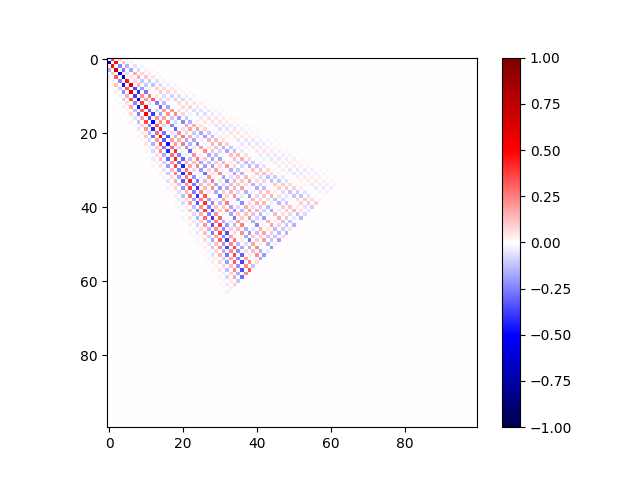

In [6]:
%matplotlib widget
plt.subplots()
Voltage_float = vectorized_float(Voltage_Return)

c = plt.imshow(Voltage_float,cmap=cm.seismic,vmax=1,vmin=-1)
plt.colorbar(c)

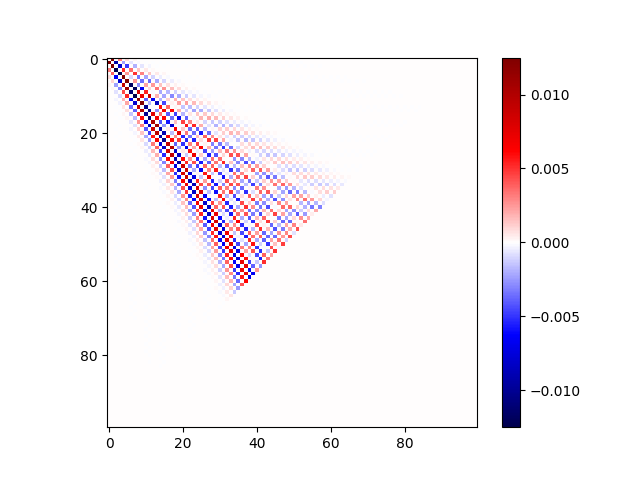

In [7]:
plt.subplots()
Current_float = vectorized_float(Current_Away)

c = plt.imshow(Current_float,cmap=cm.seismic,vmax=float(Merge_Full.Initial_Inductor_Current),vmin=-float(Merge_Full.Initial_Inductor_Current))
plt.colorbar(c)

In [17]:
def delete_alternating(arr):
    
    x_len,ylen = arr.shape
    
    x_delete = np.arange(1,x_len,2)
    y_delete = np.arange(1,ylen,2)

    arr_deleted = np.delete(arr,x_delete, axis=0)
    arr_deleted = np.delete(arr_deleted,y_delete, axis=1)
    
    return arr_deleted

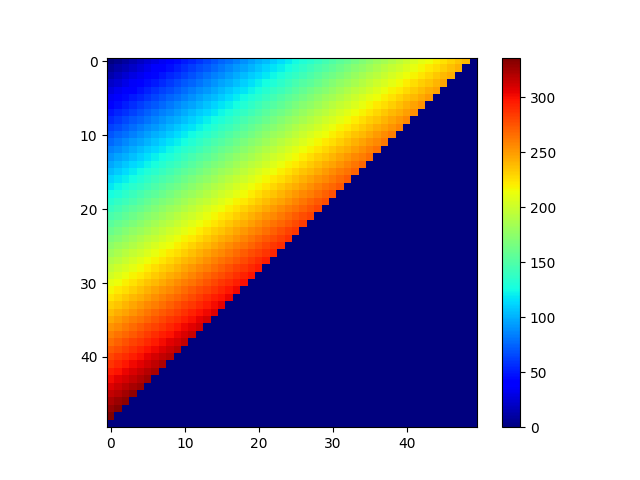

In [20]:
plt.subplots()

Time_float = vectorized_float(Inductor_Sending_Time)

Time_float = delete_alternating(Time_float)

Time_float_masked = np.ma.masked_where(Time_float == 0, Time_float)

c = plt.imshow(Time_float,cmap=cm.jet)
plt.colorbar(c)

In [9]:
Merge_Full.LCM

Decimal('35.00000000000000000000000000')

In [10]:
Merge_Full.GCD

Decimal('1')

In [11]:
Merge_Full.Inductor_LCM_Factor

5

In [12]:
Merge_Full.Capacitor_LCM_Factor

7